# Universidade Federal do Rio Grande do Norte

##  Processamento Digital de Sinais 

### Simulação Computacional - Amostragem periódica - Matlab

**Aluno:**  Lucas Bezerra Dantas Saraiva

**Professor:**  Luiz Felipe de Queiroz Silveira

**Data de entrega :**  20/10/2017


--------
## Introdução 

Trabalhad com sinais digitais promove algumas vantagens em relação aos sinais analógicos:

- Um sinal digital é capaz de ser transmitido em um meio de comunicação com maior nível de ruído e distorções do que um sinal analógico (dentro de certos limites), aumentando sua confiabilidade da transmissão. Ou seja, um sinal quantizado por mais que o ruído perturbe a natureza da onda, seus valores de amplitudes (e sua forma) são pré-definidos, sendo possível recuperar o sinal original por meio de regeneração do pulso. Na comunicação analógica, isso é dificultado, pois a forma da onda precisaria ser regenerada (e claro, ela não é conhecida na transmissão analógica). Isso possibilita o uso de regeneradores do sinal digital em uma comunicação ponto-a-ponto com um controle bem fino da taxa de erro, garantindo **confiabilidade**;
- Maior facilidade na multiplexação de sinais, resultando em maior **eficiência**;
- Maior facilidade no armazenamento em relação aos sinais analógicos, tanto por razões físicas quanto por facilidade de usar codificadores de fonte (compressores e compactadores). A codificação de fonte também é responsável por um grande aumento de **eficiência** na transmissão da informação;
- Maior facilidade de implementar estratégias de **segurança** da informação;
- Maior facilidade de manipular (armezenar e transmitir) informação com alta qualidade (e.g. imagem e vídeo em alta definição, áudio com alta fidelidade, grande quantidade de dados com baixo erro).

Nesse experimento será mostrado o efeito da amostragem de um sinal $x(t)$ de duas formas: Non-return-to-zero (Amostragem comum do Matlab) e Return-to-zero.

 ### Amostragem
 

A primeira etapa da modulação PCM é a amostragem, um processo completamente reversível, i.e., que pode ser desfeito sem perdas. Isso significa que o conjunto de amostras pode ser usado para reconstruir completamente o sinal contínuo. Para que isso ocorra, o processo de amostragem deve obedecer algumas regras. 

> Dado um sinal contínuo $m(t)$ com largura de banda $B$, desde que a frequência de amostragem seja maior que dobro da largura de banda ($f_{s}$ > 2B) é possível recuperar o sinal contínuo perfeitamente a partir do sinal amostrado (Teorema de Nyquist). 

> O sinal amostrado deve ser limitado em banda. Essa segunda regra pode ser garantida com um filtro passa-baixa aplicado ao sinal contínuo antes da amostragem.

Essas regras devem ser obedecidas para evitar o _aliasing_ (mascaramento), que nada mais é que a sobreposição das cópias espectrais resultantes do processo de amostragem. Nesta prática, veremos esse efeito em um sinal exponencial.

O código a seguir mostra a maneira genérica de gerar um sinal senoidal no Matlab. Dessa maneira, dependedo do referencial temporal, podemos modelar um sinal contínuo no tempo (taxa amostragem alta). Contudo, isso é somente um modelo, pois, na realidade, todos os sinais em um computador são discretos.


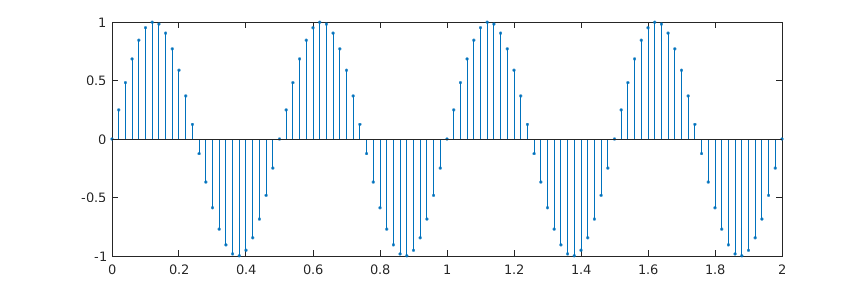

In [28]:
Ts = 0.02;                                          % Período de amostragem
t = 0:Ts:2;                                         % Eixo do tempo
m = sin(2*pi*2*t);                                  % Sinal m(t)
fig = figure;
stem(t,m,'.');
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 3];

O sinal $m(t)$ construído acima não é contínuo no tempo, mas discreto. Contudo, depedendo da maneira que o sinal é mostrado (função stem ou função plot), sua visualização no domínio do tempo é diferente.  Isso ocorre porque a função $plot$ liga os pontos do vetor por meio de retas, dando a visualização de um sinal contínuo. Contudo, a amostra em $t = 0.01$, simplesmente, não existe, pois o eixo temporal foi construído em passos de $0.02$. 


## Subamostragem e Sobreamostragem

A importância da sobreamostragem e subamostragem está na adequação do rítmo das amostras numa cadeia de processamento digital de sinais envolvendo hardwares diferentes. Podemos ter situações que hardwares com diferentes capacidades de processamento tenham que, ao trabalharem em conjunto no mesmo sinal, realizar mudanças de taxa de amostragem para adequar o envio/recebimento de amostras no ritmo que eles consigam trabalhar. Como por exemplo a placa de som de um computador. Trabalhando numa frequência de $f=44.1 kHz$ precisam que os softwares que a usam mandem amostras nesse ritmo para que não distorça o sinal de áudio.

O processo de amostragem será baseado na amostragem ensinada no [Lathi](https://www.amazon.com/Digital-Communication-Electrical-Computer-Engineering/dp/0195331451). Será feito uso de duas funções do Matlab: ** Downsample** e **Upsample**.

A função **downsample** do Matlab coleta amostras em um intervalo de $N$ elementos, especificado como parâmetro

In [6]:
N = 10;                                             % Número de amostras puladas
x=0:1:100;                                          % Vetor com número inteiros de 0 à 100, de 1 em 1
y= downsample(x,N);                                 % Coleta 1 elemento a cada 10 elementos do vetor
disp(y);

     0    10    20    30    40    50    60    70    80    90   100



Similarmente, a função **upsample** do Matlab aumenta o vetor preenchendo com zeros $(N - 1)$ elementos entre as amostras do vetor de entrada.

In [7]:
x=1:1:10;                                            % Vetor com inteiros de 1 a 10
N = 3;                                               % Número de sobreamostragem
y = upsample(x,N);                                   % Coloca 1 amostra a cada (N-1) elementos
disp(y);

  Columns 1 through 13

     1     0     0     2     0     0     3     0     0     4     0     0     5

  Columns 14 through 26

     0     0     6     0     0     7     0     0     8     0     0     9     0

  Columns 27 through 30

     0    10     0     0



O uso em conjunto dessas duas funções permite simular a amostragem ideal (retornando imediatamente para zero).


# Experimento:


Faremos a amostragem do sinal

$$x(t) = e^{-1000 \left | n \right |}$$

Pela definição da DTFT, temos que 

$$ X(e^{j\omega})=\sum_{- \infty}^{\infty} x[n]e^{-j\omega n}$$

Logo, devemos encontrar $X(e^{j\omega})$ 

$$ X(e^{j\omega})=\sum_{- \infty}^{\infty} e^{-1000 \left | n \right |}\cdot e^{-j\omega n}$$


$$ =\sum_{- \infty}^{-1} e^{-1000 \left | n \right |} \cdot e^{-j\omega n}+ \sum_{0}^{\infty} e^{-1000 \left | n \right |}\cdot e^{-j\omega n}$$



$$ =\sum_{- \infty}^{-1} e^{1000  n} \cdot e^{-j\omega n} + \sum_{0}^{\infty} e^{-1000  n}\cdot e^{-j\omega n}$$


$$ =\sum_{- \infty}^{-1} e^{n\cdot(1000-j\omega)} + \sum_{0}^{\infty} e^{n\cdot (-1000-j\omega)}$$

Sendo $\left \{ \begin{align*}k_{1} &= e^{(1000-j\omega)}\\ k_{2} &= e^{(-1000-j\omega)}\end{align*} \right.$

$$ =\sum_{- \infty}^{-1} k_{1}^{n} + \sum_{0}^{\infty} k_{2}^{n}$$

Sendo $\left \{ \begin{align*}A &= \sum_{- \infty}^{-1} k_{1}^{n} \\ B &= \sum_{0}^{\infty} k_{2}^{n}\end{align*}\right.$

$$X(e^{j\omega})=A+B$$


Resolvendo $A$, temos:
$$A=\frac{1}{k_{1}-1}=\frac{1}{e^{(1000-j\omega)}-1}$$
Resolvendo $B$, temos:
$$B=\frac{1}{1-k_{2}}=\frac{1}{1-e^{(-1000-j\omega)}}$$

Logo, temos que:
$$X(e^{j\omega})=\frac{1}{e^{(1000-j\omega)}-1}+\frac{1}{1-e^{(-1000-j\omega)}}$$

Finalmente temos:

$$X(e^{j\omega})=\frac{k_{2}-k_{1}}{(k_{1}-1)(k_{2}-1)}$$

In [1]:
clc;clear all;close all;
%% Parâmetros
fs=5*1e4;
ti=5e-3;                                                % Tempo inicial
t=-ti:1/fs:ti-1/fs;                                     % Eixo do tempo
lfft=length(t);
freq=-fs/2:fs/lfft:fs/2-1/fs;
k1=exp(1000-1j*freq);
k2=exp(-1000-1j*freq);
X_ejw=(k2-k1)/((k1-1)*(k2-1));
plot(abs(X_ejw))

Error using *
Inner matrix dimensions must agree.



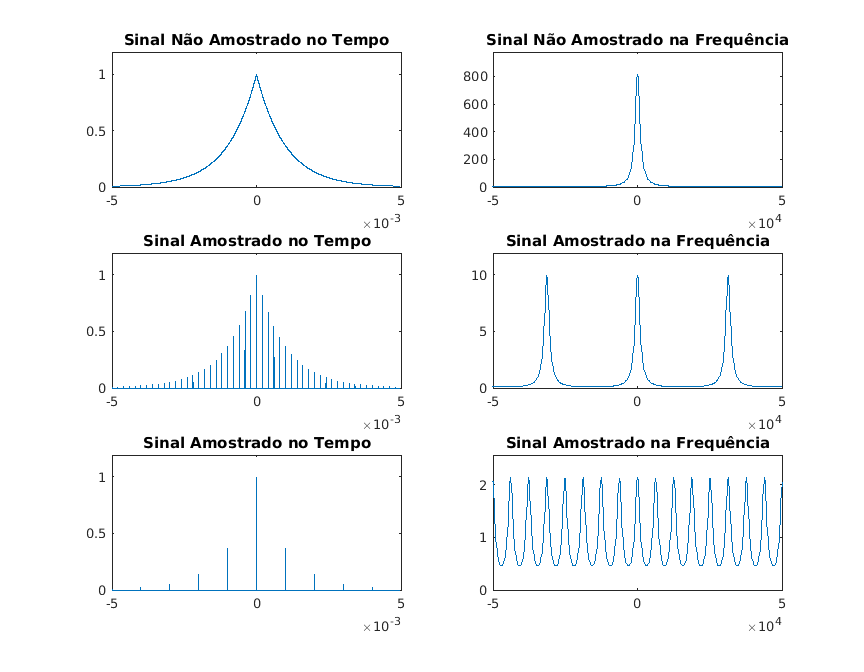

In [23]:
clc;clear all;close all;
%% Parâmetros
t_0=5e-3;                                                   % Tempo de "Período"
N_ele=2048;                                                 % Número de elementos do Sinal
T=t_0/N_ele;                                                % Taxa de amostragem (Passo entre as amostras)
fs=1/T;                                                     % Frequência de amostragem
t=-t_0:1/fs:t_0-1/fs;                                       % Eixo do tempo
xv=exp(-1000*abs(t));                                       % Sinal x(n)
% Plotting
fig=figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 7];
subplot(3,2,1)
plot(t,xv)
title('Sinal Não Amostrado no Tempo')
axis([-t_0 t_0 0 1.2*max(abs(xv))])

%% Aplicando a transformada de Fourier ao sinal 500kHz - No_return-to-zero
freq=-fs/2:fs/N_ele:fs/2-1/fs;                              % Montagem do eixo da frequência
Xa=dtft(xv,t,freq);                                         % Espectro do sinal DTFT
% Plotting
subplot(3,2,2)
plot(freq,abs(Xa))
title('Sinal Não Amostrado na Frequência')
axis([-50000 50000 0 1.2*max(abs(Xa))])

%% Amostragem 1kHz
fs1k=1e3;                                                   % Nova frequência de amostragem 1kHz
N=round(fs/fs1k);                                           % Números de elementos pulados
x_samp1=downsample(xv,N);                                   % Coleta 1 amostra a cada N_samp amostras do sinal 
x_samp1=upsample(x_samp1,N);                                % Retorna vetor amostrado com o número inicial de elementos
x_samp1=x_samp1(1,1:length(t));                             % Corrige comprimento de vetores
% Plotting
subplot(3,2,5)
plot(t,x_samp1(1,1:length(t)))                 
title('Sinal Amostrado no Tempo')
axis([-t_0 t_0 0 1.2*max(abs(x_samp1))])

%% Aplicando a transformada de Fourier ao sinal Amostrado 1kHz
Xa1=dtft(x_samp1,t,freq);                                   % Espectro do sinal DTFT
% Plotting
subplot(3,2,6)
plot(freq,abs(Xa1))
title('Sinal Amostrado na Frequência')
axis([-50000 50000 0 1.2*max(abs(Xa1))])

%% Amostragem 5kHz
fs5k=5e3;                                                   % Nova frequência de amostragem 5kHz
N=round(fs/fs5k);                                           % Numeros de elementos pulados
x_samp5=downsample(xv,N);                                   % Coleta 1 amostra a cada N_samp amostras do sinal 
x_samp5=upsample(x_samp5,N);                                % Retorna vetor amostrado com o número inicial de elementos
x_samp5=x_samp5(1,1:length(t));                             % Corrige comprimento de vetores
% Plotting
subplot(3,2,3)
plot(t,x_samp5(1,1:length(t)))                 
title('Sinal Amostrado no Tempo')
axis([-t_0 t_0 0 1.2*max(abs(x_samp5))])

%% Aplicando a transformada de Fourier ao sinal Amostrado 5kHz
Xa5=dtft(x_samp5,t,freq);                                   % Espectro do sinal DTFT   
% Plotting
subplot(3,2,4)
plot(freq,abs(Xa5))
title('Sinal Amostrado na Frequência')
axis([-50000 50000 0 1.2*max(abs(Xa5))])